In [51]:
#check for files
import os

In [52]:
os.listdir()

['.ipynb_checkpoints', '911.csv', '911.ipynb']

In [53]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [54]:
#avoid showing new page
%matplotlib inline

In [55]:
dataFrame = pd.read_csv('./911.csv')

In [56]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [57]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [58]:
dataFrame['zip'].value_counts().head(5)

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [59]:
dataFrame['twp'].value_counts().head(5)

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [60]:
dataFrame['title'].nunique()

131

In [61]:
dataFrame['specificReason']= dataFrame['title'].apply(lambda title:title.split(':')[1])

In [62]:
dataFrame['specificReason'].value_counts()

 VEHICLE ACCIDENT -              68123
 DISABLED VEHICLE -              20667
 VEHICLE ACCIDENT                16747
 FIRE ALARM                      16359
 RESPIRATORY EMERGENCY           14637
 FALL VICTIM                     14584
 CARDIAC EMERGENCY               14491
 ROAD OBSTRUCTION -               8767
 SUBJECT IN PAIN                  8151
 HEAD INJURY                      7613
 UNKNOWN MEDICAL EMERGENCY        5170
 SYNCOPAL EPISODE                 5000
 SEIZURES                         4808
 GENERAL WEAKNESS                 4619
 ALTERED MENTAL STATUS            4208
 ABDOMINAL PAINS                  4145
 MEDICAL ALERT ALARM              4045
 FIRE INVESTIGATION               3992
 HEMORRHAGING                     3692
 OVERDOSE                         3673
 UNCONSCIOUS SUBJECT              3666
 CVA/STROKE                       3627
 NAUSEA/VOMITING                  3408
 GAS-ODOR/LEAK                    3131
 BUILDING FIRE                    2770
 CARDIAC ARREST          

In [63]:
dataFrame['specificReasonPrefix']= dataFrame['title'].apply(lambda title:title.split(':')[0])

In [64]:
dataFrame['specificReasonPrefix'].value_counts().head(5)

EMS        144362
Traffic    101889
Fire        42989
Name: specificReasonPrefix, dtype: int64

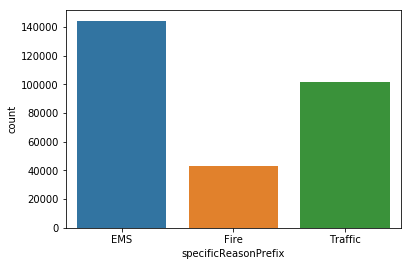

In [65]:
sns.countplot(x='specificReasonPrefix' , data=dataFrame)

In [66]:
dataFrame['timeStamp']= pd.to_datetime(dataFrame['timeStamp'])

In [67]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 11 columns):
lat                     289240 non-null float64
lng                     289240 non-null float64
desc                    289240 non-null object
zip                     253942 non-null float64
title                   289240 non-null object
timeStamp               289240 non-null datetime64[ns]
twp                     289137 non-null object
addr                    289240 non-null object
e                       289240 non-null int64
specificReason          289240 non-null object
specificReasonPrefix    289240 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 24.3+ MB


In [70]:
dataFrame['Hour'] = dataFrame['timeStamp'].apply(lambda time: time.hour)
dataFrame['Month'] = dataFrame['timeStamp'].apply(lambda time: time.month)
dataFrame['Day'] = dataFrame['timeStamp'].apply(lambda time: time.dayofweek)

In [74]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specificReason,specificReasonPrefix,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,12,3


In [76]:
dataFrame['Day'].nunique()

7

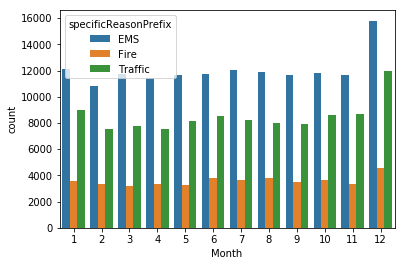

In [83]:
sns.countplot(x='Month', data=dataFrame, hue='specificReasonPrefix')

In [89]:
byMonth = dataFrame.groupby('Month').count()

In [90]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specificReason,specificReasonPrefix,Hour,Day
Month,,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093


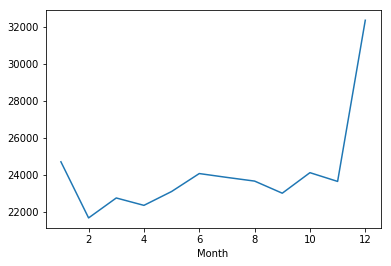

In [91]:
byMonth['specificReasonPrefix'].plot()